# BI - Laboratorio 2
- Manuel Felipe Carvajal Parra 202014203

## 0. Imports

In [1]:
# Librerías para manipulación y cálculo numérico
import numpy as np
import pandas as pd

# Configuración de pandas para visualizar más filas y columnas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

# -------------------------------------------
# Utilidades para guardar y cargar modelos
from joblib import dump, load

# -------------------------------------------
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------
# Herramientas de scikit-learn para preparación de datos y modelado
# División de datos, regresión lineal y creación de pipelines y transformaciones
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Métricas para evaluar el modelo de regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------------------
# Funciones estadísticas adicionales
import scipy.stats as stats

# -------------------------------------------
from sklearn.cluster import KMeans

# Librerías para análisis de datos
#from ydata_profiling import ProfileReport

## 1. Carga de datos

En esta sección se explica cómo se carga el conjunto de datos que se utilizará a lo largo del laboratorio. Se suele emplear la función pd.read_csv (o funciones similares) para leer archivos con formato CSV, Excel u otros, permitiendo convertir la información en un DataFrame de pandas. Así, se asegura que la data esté disponible para realizar análisis exploratorio, procesamiento y modelado posterior.

In [7]:
# Carga de datos
df = pd.read_csv("./Datos_SenecaféAlpes.csv", encoding="ISO-8859-1", sep=";")    

## 2. Entendimiento de los datos

En esta sección se realiza un análisis exploratorio para obtener una visión general del conjunto de datos de los granos de café. El objetivo es identificar posibles problemas de calidad, detectar valores atípicos y entender la distribución de las variables numéricas. Estas visualizaciones permiten conocer el comportamiento de los datos antes de aplicar los algoritmos de agrupación.


### 2.1 Analisis numerico

A continuación se seleccionan las variables numéricas del dataset, que corresponden a las medidas geométricas y morfológicas de los granos de café. Estas variables serán la base para la aplicación de los algoritmos de agrupación, ya que contienen la información cuantitativa relevante.


In [8]:
numericas = [
    'Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
    'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida',
    'Solidez', 'Redondez', 'Compacidad',
    'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4'
]

print("Número de variables numéricas seleccionadas:", len(numericas))
print(numericas[:8], "...")


Número de variables numéricas seleccionadas: 15
['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida'] ...


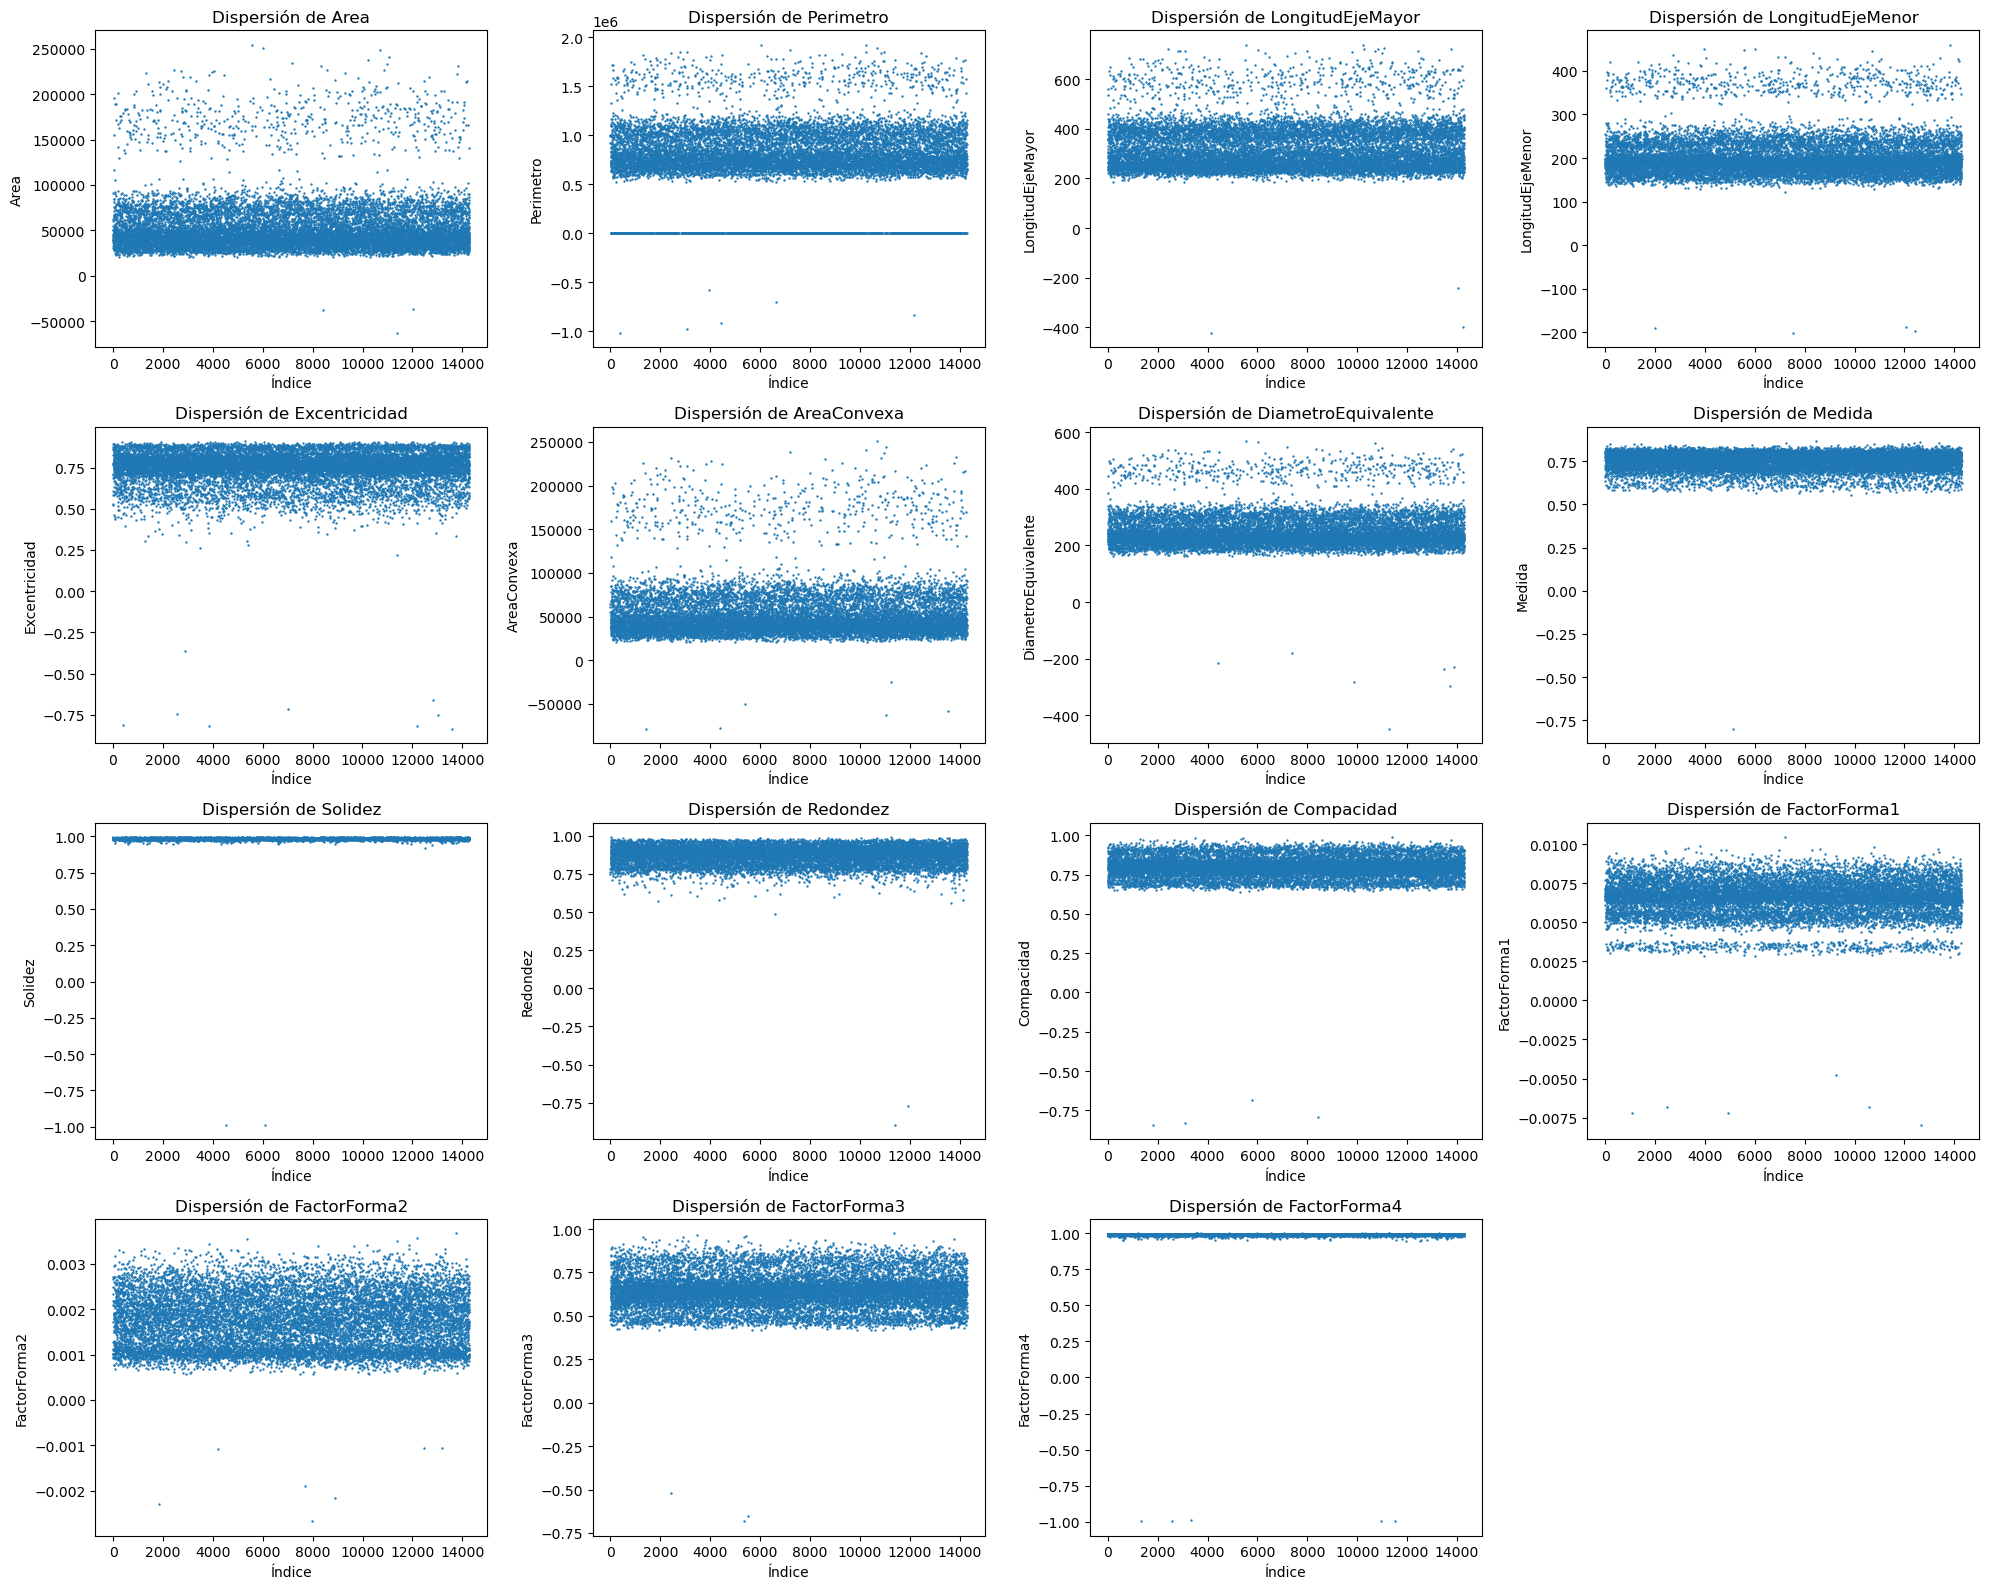

In [9]:
import math

# Configuración de subplots
columnas_por_fila = 4
filas = math.ceil(len(numericas) / columnas_por_fila)
fig, ejes = plt.subplots(filas, columnas_por_fila, figsize=(columnas_por_fila * 5, filas * 4))
ejes = ejes.flatten()

# Graficar cada variable numérica
for eje, columna in zip(ejes, numericas):
    eje.scatter(df.index, df[columna], s=0.5)
    eje.set_xlabel("Índice")
    eje.set_ylabel(columna)
    eje.set_title(f"Dispersión de {columna}")

# Ocultar subplots vacíos
for eje in ejes[len(numericas):]:
    eje.set_visible(False)

plt.tight_layout()
plt.show()
